In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.shape

(545, 13)

In [6]:
data = data.replace('yes',1)
data= data.replace('no',0)
data.head()

/tmp/ipykernel_33/728474773.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('no',0)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
np.unique(data['furnishingstatus'])

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [9]:
data = data.replace('furnished',2)
data= data.replace('semi-furnished',1)
data= data.replace('unfurnished',0)
data.head()

/tmp/ipykernel_33/763727214.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('unfurnished',0)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


<Axes: xlabel='bedrooms', ylabel='price'>

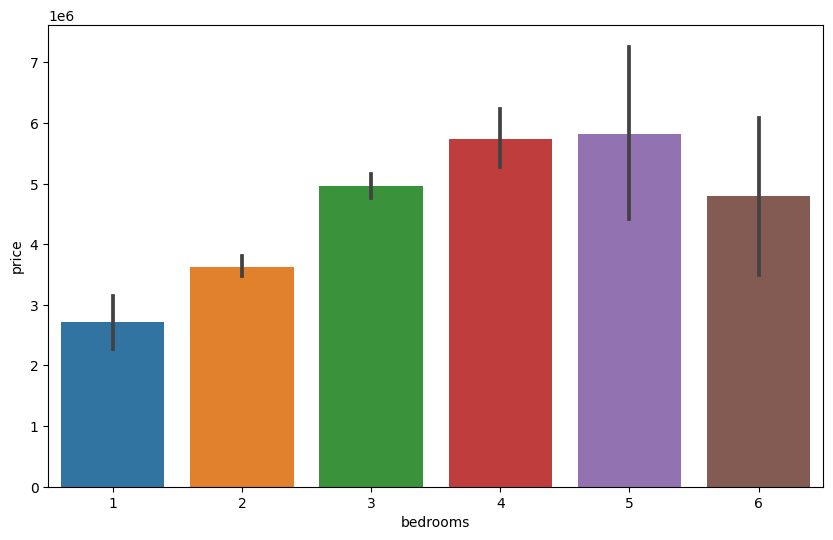

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'bedrooms', y = 'price', data = data)

Note that having more bedrooms does not necessary increase price of the property.

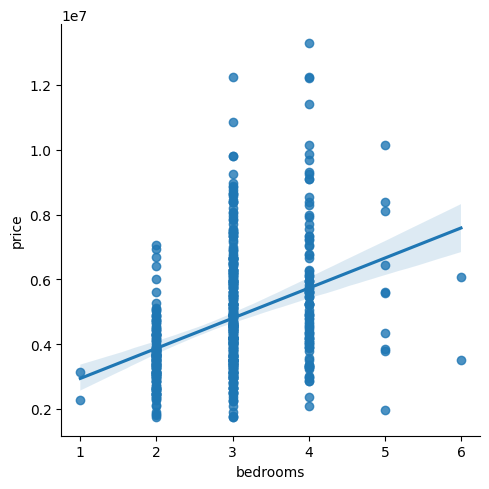

In [12]:
sns.lmplot(x='bedrooms', y='price', data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

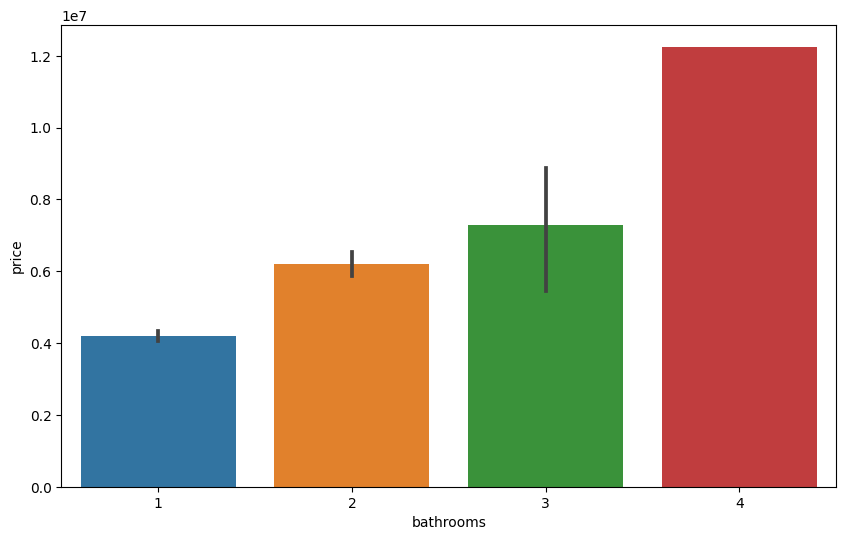

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'bathrooms', y = 'price', data = data)

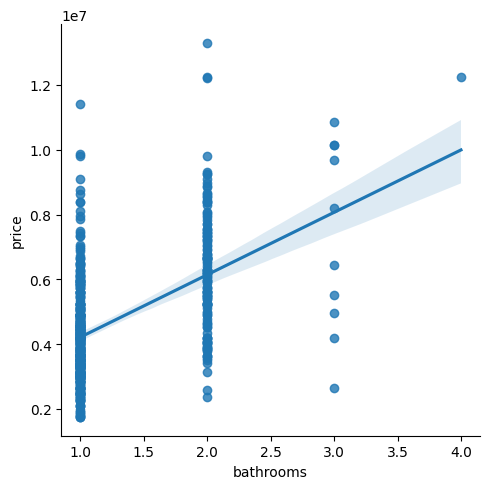

In [14]:
sns.lmplot(x='bathrooms', y='price', data=data)

<Axes: xlabel='stories', ylabel='price'>

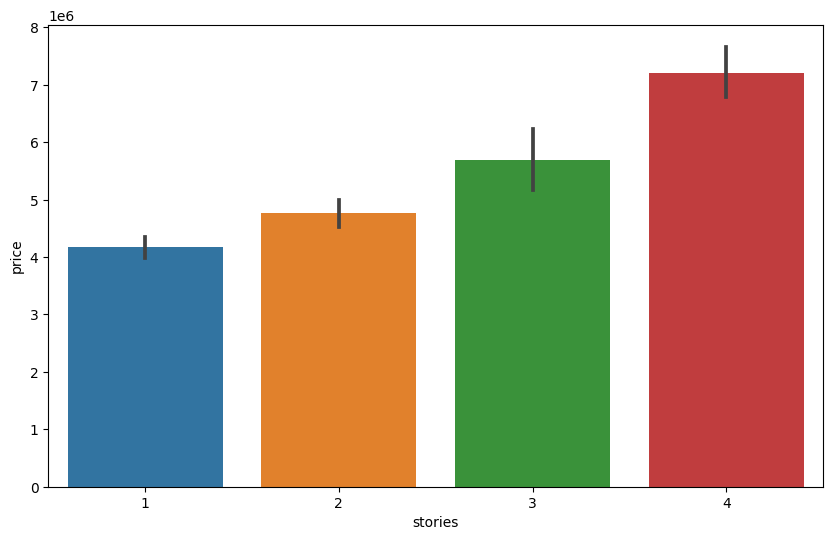

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'stories', y = 'price', data = data)

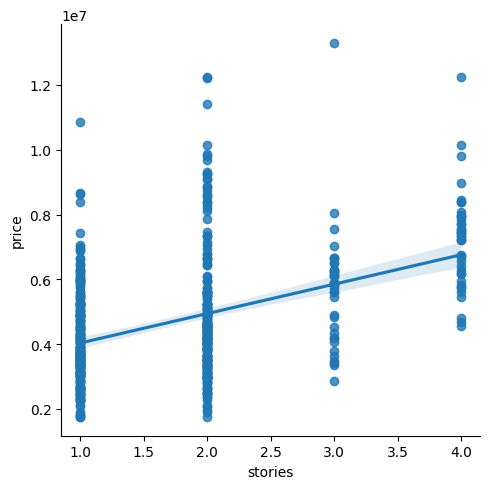

In [16]:
sns.lmplot(x='stories', y='price', data=data)

<Axes: xlabel='guestroom', ylabel='price'>

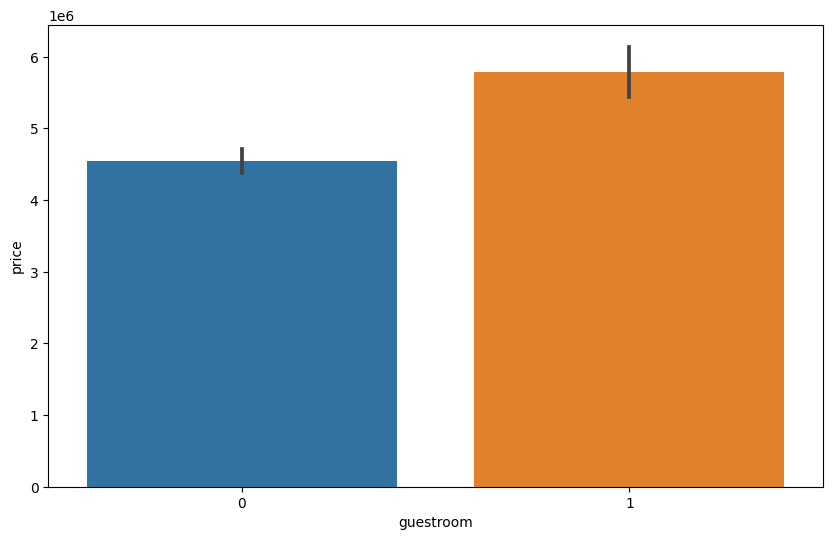

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'guestroom', y = 'price', data = data)

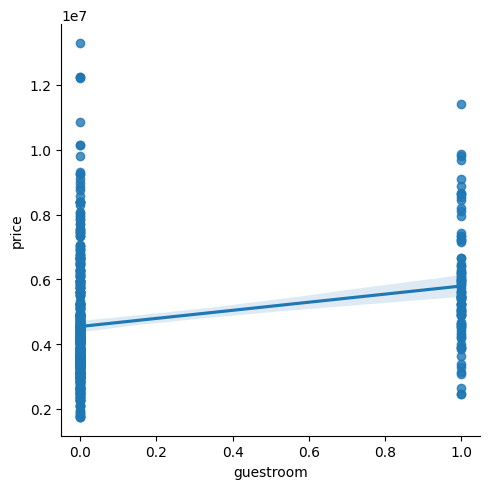

In [19]:
sns.lmplot(x='guestroom', y='price', data=data)

<Axes: xlabel='basement', ylabel='price'>

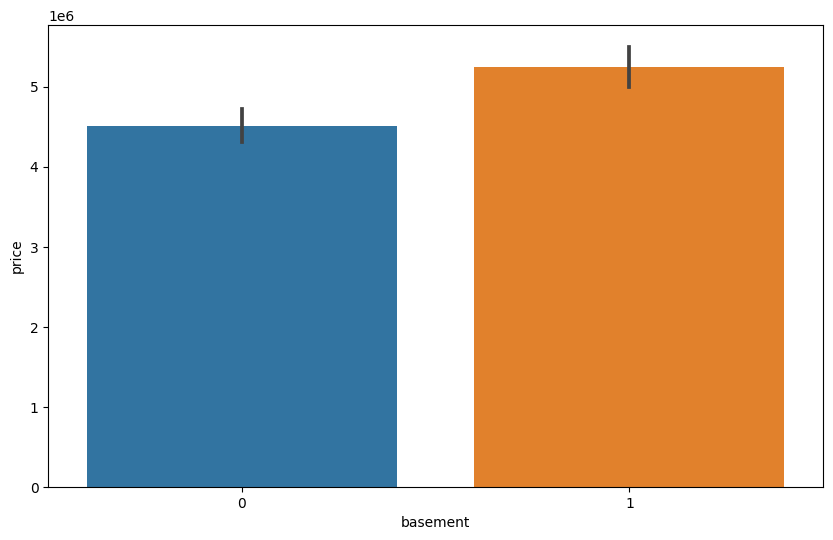

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'basement', y = 'price', data = data)

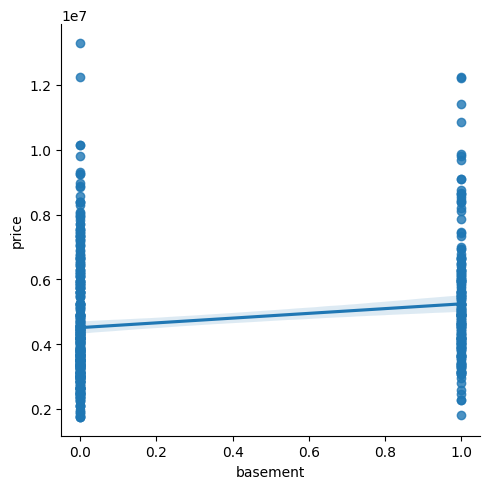

In [20]:
sns.lmplot(x='basement', y='price', data=data)

<Axes: xlabel='parking', ylabel='price'>

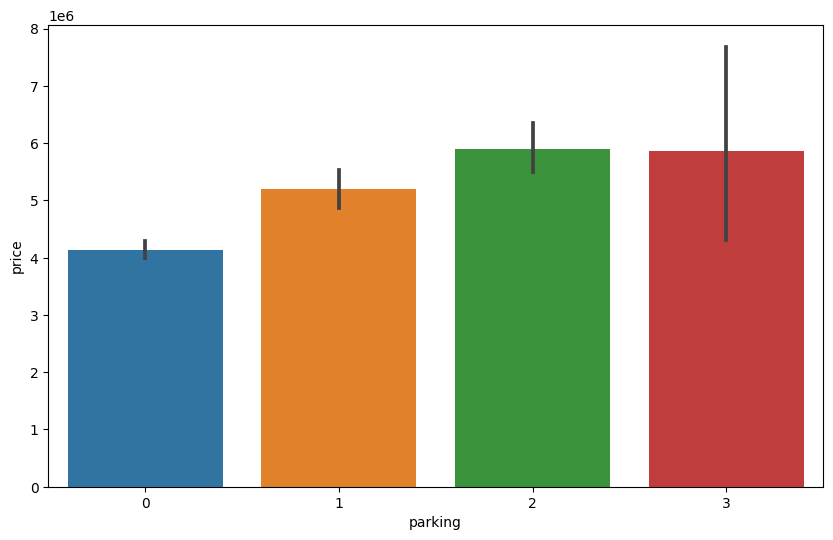

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'parking', y = 'price', data = data)

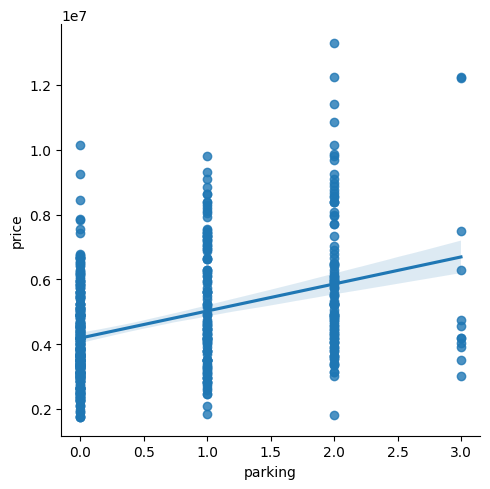

In [22]:
sns.lmplot(x='parking', y='price', data=data)

<Axes: xlabel='hotwaterheating', ylabel='price'>

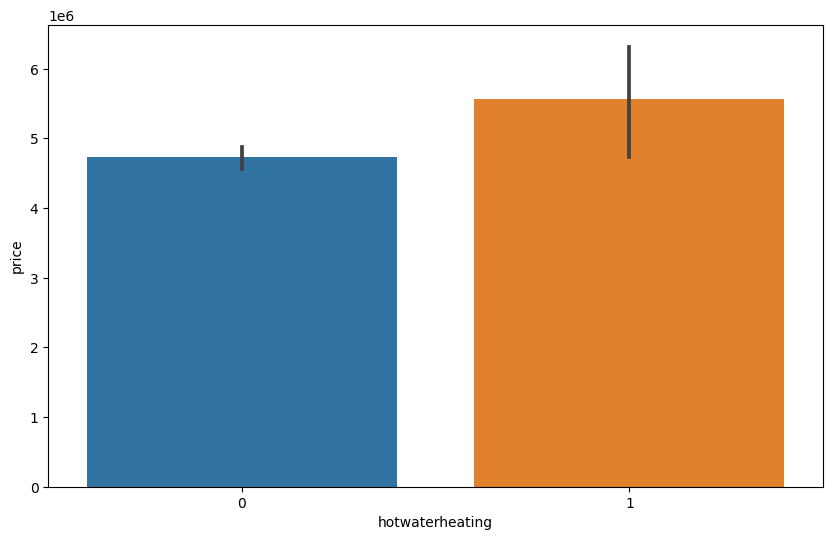

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'hotwaterheating', y = 'price', data = data)

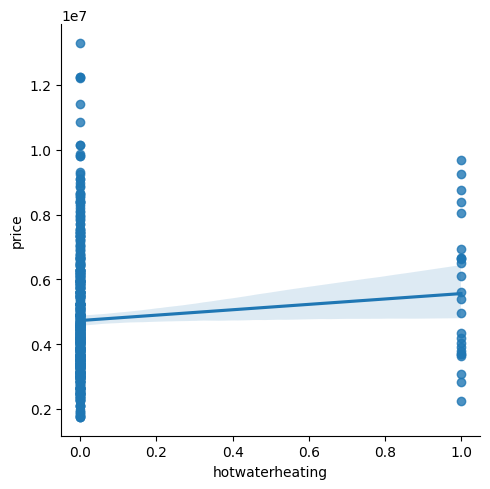

In [24]:
sns.lmplot(x='hotwaterheating', y='price', data=data)

<Axes: xlabel='furnishingstatus', ylabel='price'>

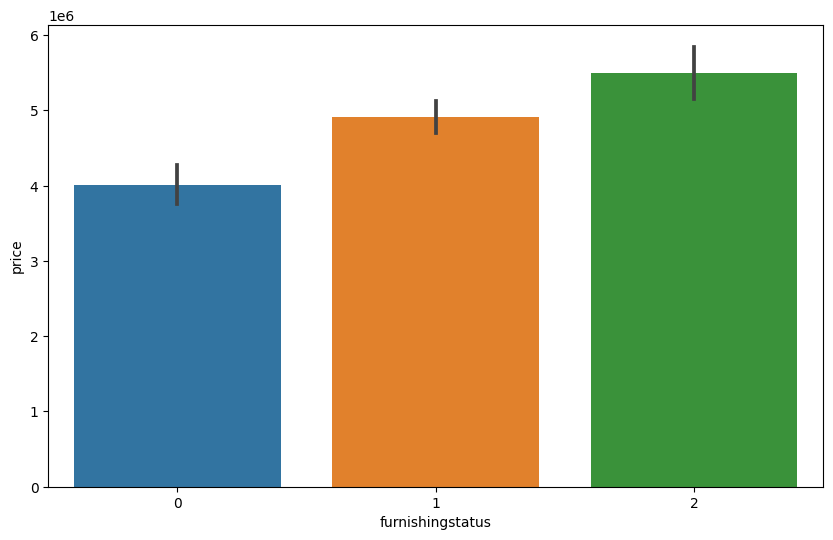

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'furnishingstatus', y = 'price', data = data)

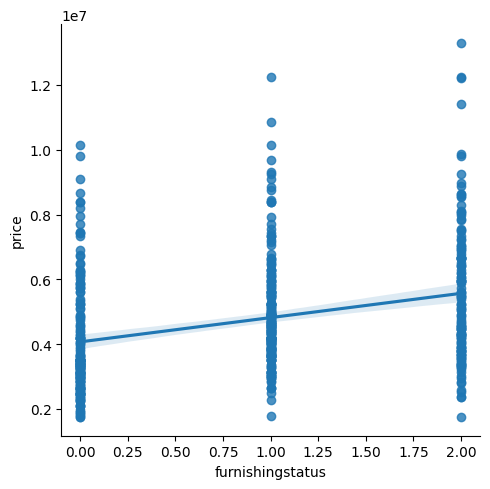

In [26]:
sns.lmplot(x='furnishingstatus', y='price', data=data)

In [27]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [28]:
X = data.drop('price',axis=1)
Y = data['price']
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [29]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X)
X_train_norm = norm.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_train_norm, Y, test_size = 0.3, shuffle=True)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
print('Score:', knn_regressor.score(X_test, y_test))

Score: 0.43058053827948317


In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for k in range(1, 20):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    predictions = knn_regressor.predict(X_test)
    print(f'K VALUE {k}: Score: {knn_regressor.score(X_test, y_test)}')
    

K VALUE 1: Score: 0.3925241622287535
K VALUE 2: Score: 0.4587382780044593
K VALUE 3: Score: 0.43058053827948317
K VALUE 4: Score: 0.5126665166549083
K VALUE 5: Score: 0.5094572261342758
K VALUE 6: Score: 0.5112847726779768
K VALUE 7: Score: 0.5155046828945282
K VALUE 8: Score: 0.5227881117737763
K VALUE 9: Score: 0.5317984422720342
K VALUE 10: Score: 0.5209887142586551
K VALUE 11: Score: 0.5060806696130978
K VALUE 12: Score: 0.5009001363657577
K VALUE 13: Score: 0.506568524841429
K VALUE 14: Score: 0.5046953655550568
K VALUE 15: Score: 0.5017155639695752
K VALUE 16: Score: 0.506686050481097
K VALUE 17: Score: 0.5083225556821399
K VALUE 18: Score: 0.5125323513201749
K VALUE 19: Score: 0.5073975499200127


We can note that K value of 9 provides the most accurate results